In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_system import ResearchSystem

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = ResearchSystem(
    llm_config=llm_config,
    compile_config=compile_config
)

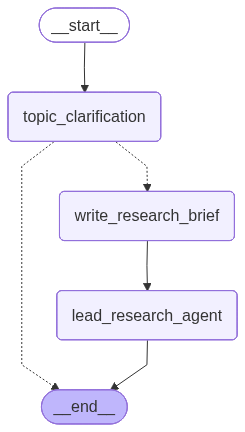

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [3]:
config = {"configurable": {"thread_id": "scoping-session-1"}}
result = await app.ainvoke(
    input={"messages": [
        HumanMessage(content="I want to research the best coffee shops")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to research the best coffee shops                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": false, "question": "Could you specify the location or city you are interested in for the │
│ best coffee shops?"}                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
result = await app.ainvoke(
    {"messages": [
        HumanMessage(content="Coffe shops in San Francisco. The criteria should be the best customer reviews attending to coffe quality")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to research the best coffee shops                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": false, "question": "Could you specify the location or city you are interested in for the │
│ best coffee shops?"}                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Coffe shops in San Francisco. The criteria should be the best customer reviews attending to coffe quality       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": true, "question": ""}                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"title": "What are the top-rated coffee shops in San Francisco based on customer reviews, specifically         │
│ focusing on coffee quality, and what factors contribute to their high ratings?"}                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The user is interested in the best coffee shops in San Francisco, specifically those with high │
│ customer reviews regarding coffee quality. I will delegate research to find a list of top-rated coffee shops    │
│ based on customer feedback and reviews. This can be done in a single research call since it is a                │
│ straightforward request."                                                                                       │
│ }                                                                                                               │
│    ID: call_TJFX44AiLaGZOEWJOPbio2Gs                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The user is interested in the best coffee shops in San Francisco, specifically those with  │
│ high customer reviews regarding coffee quality. I will delegate research to find a list of top-rated coffee     │
│ shops based on customer feedback and reviews. This can be done in a single research call since it is a          │
│ straightforward request.                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "List the top coffee shops in San Francisco based on customer reviews, focusing on coffee   │
│ quality."                                                                                                       │
│ }                                                                                                               │
│    ID: call_NZUb0FqbcL4xsb7ncrokWwdo                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for top coffee shops in San Francisco based on customer reviews and coffee quality.                   │
│ 2. Search for customer reviews of top coffee shops in San Francisco.                                            │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│ 1. **Sightglass Coffee**                                                                                        │
│    - Known for its high-quality specialty coffee and unique atmosphere. It has garnered over 2,200 reviews on   │
│ Yelp, indicating its popularity among coffee enthusiasts.                                                       │
│                                                                                                                 │
│ 2. **Saint Frank Coffee**                                                                                       │
│    - Celebrated for its ethically sourced coffee and minimalist decor. It offers unique drinks like the Almond  │
│ Macadamia Nut Latte and is recognized for its commitment to quality.                                            │
│                                                                                                                 │
│ 3. **Ritual Coffee Roasters**                                                                                   │
│    - This shop is known for its artisanal approach to coffee, focusing on specialty-grade coffees sourced from  │
│ smaller farmers. Ritual is a staple in the San Francisco coffee scene.                                          │
│                                                                                                                 │
│ 4. **Blue Bottle Coffee**                                                                                       │
│    - Famous for its sleek design and organic coffee, Blue Bottle is a must-visit for those seeking a quality    │
│ coffee experience.                                                                                              │
│                                                                                                                 │
│ 5. **Andytown Coffee**                                                                                          │
│    - Known for its beautiful views and unique offerings like The Original Bird, a caffeine-infused drink with   │
│ sparkling water and espresso.                                                                                   │
│                                                                                                                 │
│ 6. **Hedge Coffee Roasters**                                                                                    │
│    - A newer entrant that has quickly gained a reputation for its methodical approach to coffee brewing and     │
│ high-quality beans.                                                                                             │
│                                                                                                                 │
│ 7. **Red Bay Coffee**                                                                                           │
│    - Celebrated for its diverse flavored lattes and commitment to community, making it a favorite among locals. │
│                                                                                                                 │
│ 8. **The Mill**                                                                                                 │
│    - Famous not only for its coffee but also for its ar

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I found a comprehensive list of top coffee shops in San Francisco based on customer reviews,   │
│ focusing on coffee quality. The findings include notable shops like Sightglass Coffee, Saint Frank Coffee, and  │
│ Ritual Coffee Roasters, among others. Each shop has unique offerings and has received positive feedback from    │
│ customers. I have sufficient information to provide a well-rounded answer to the user's request."               │
│ }                                                                                                               │
│    ID: call_BZOlJztU5jdT7Rq9ckWHhRca                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I found a comprehensive list of top coffee shops in San Francisco based on customer        │
│ reviews, focusing on coffee quality. The findings include notable shops like Sightglass Coffee, Saint Frank     │
│ Coffee, and Ritual Coffee Roasters, among others. Each shop has unique offerings and has received positive      │
│ feedback from customers. I have sufficient information to provide a well-rounded answer to the user's request.  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ResearchComplete                                                                                  │
│    Args: {}                                                                                                     │
│    ID: call_OtxjSfTigv4hX5ZTZNDrzFrW                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for top coffee shops in San Francisco based on customer reviews and coffee quality.                   │
│ 2. Search for customer reviews of top coffee shops in San Francisco.                                            │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│ 1. **Sightglass Coffee**                                                                                        │
│    - Known for its high-quality specialty coffee and unique atmosphere. It has garnered over 2,200 reviews on   │
│ Yelp, indicating its popularity among coffee enthusiasts.                                                       │
│                                                                                                                 │
│ 2. **Saint Frank Coffee**                                                                                       │
│    - Celebrated for its ethically sourced coffee and minimalist decor. It offers unique drinks like the Almond  │
│ Macadamia Nut Latte and is recognized for its commitment to quality.                                            │
│                                                                                                                 │
│ 3. **Ritual Coffee Roasters**                                                                                   │
│    - This shop is known for its artisanal approach to coffee, focusing on specialty-grade coffees sourced from  │
│ smaller farmers. Ritual is a staple in the San Francisco coffee scene.                                          │
│                                                                                                                 │
│ 4. **Blue Bottle Coffee**                                                                                       │
│    - Famous for its sleek design and organic coffee, Blue Bottle is a must-visit for those seeking a quality    │
│ coffee experience.                                                                                              │
│                                                                                                                 │
│ 5. **Andytown Coffee**                                                                                          │
│    - Known for its beautiful views and unique offerings like The Original Bird, a caffeine-infused drink with   │
│ sparkling water and espresso.                                                                                   │
│                                                                                                                 │
│ 6. **Hedge Coffee Roasters**                                                                                    │
│    - A newer entrant that has quickly gained a reputation for its methodical approach to coffee brewing and     │
│ high-quality beans.                                                                                             │
│                                                                                                                 │
│ 7. **Red Bay Coffee**                                                                                           │
│    - Celebrated for its diverse flavored lattes and commitment to community, making it a favorite among locals. │
│                                                                                                                 │
│ 8. **The Mill**                                                                                                 │
│    - Famous not only for its coffee but also for its ar